<a href="https://colab.research.google.com/github/MariamAbdo217/Data-Analysis-Report/blob/main/DSCI_II_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Data Cleansing***

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

import random

In [ ]:
filenames = [
    'broadband.xlsx',
    'cellphones.xlsx',
    'computers.xlsx',
    'gdp.xlsx',
    'internetusers.xlsx',
    'percapita.xlsx',
    'population.xlsx'
]
dfs = []

for filename in filenames:
    dfs.append(pd.read_excel(filename))

common = set(dfs[0]['country']) #the first DataFrame
for df in dfs[1:]:
    common = common.intersection(df['country'])

# Print common countries
print("Common countries:", list(common))
num_common_countries = len(common)
print(num_common_countries)

Common countries: ['Croatia', 'Bosnia and Herzegovina', 'Haiti', 'Peru', 'Portugal', 'Thailand', 'Turkey', 'Iran', 'Marshall Islands', 'Bahamas', 'Latvia', 'El Salvador', 'Ukraine', 'Tanzania', 'Solomon Islands', 'Senegal', 'Kuwait', 'Argentina', 'Zambia', 'Syria', 'Georgia', 'Eswatini', 'Central African Republic', 'Ghana', 'China', 'Ecuador', 'Nicaragua', 'Chad', 'St. Kitts and Nevis', 'Qatar', 'Hong Kong, China', 'Guinea-Bissau', 'Sudan', 'Grenada', 'Chile', 'Micronesia, Fed. Sts.', 'Iraq', 'Cambodia', 'Pakistan', 'Slovak Republic', 'Germany', 'Guinea', 'Maldives', 'Czech Republic', 'Bahrain', 'Lao', 'United Kingdom', 'Greece', 'Slovenia', 'Comoros', 'Dominican Republic', 'Papua New Guinea', 'Romania', 'Sweden', 'Tonga', 'Jordan', 'Denmark', 'Mali', 'Suriname', 'South Africa', 'Azerbaijan', 'Bhutan', 'Gabon', 'Iceland', 'Sao Tome and Principe', 'Hungary', 'Colombia', 'Turkmenistan', 'Monaco', 'Vietnam', 'Uganda', 'Austria', 'Morocco', 'Poland', 'United States', 'United Arab Emirates'

In [ ]:
Africa = ["Angola", "Benin", "Burkina Faso", "Burundi", "Cameroon", "Central African Republic","Chad", "Comoros", "Democratic Republic of the Congo", "Djibouti", "Eritrea", "Ethiopia","Gambia", "Guinea", "Guinea-Bissau", "Lesotho", "Liberia", "Madagascar", "Malawi", "Mali","Mauritania", "Mozambique", "Niger", "Rwanda", "Sao Tome and Principe", "Senegal","Sierra Leone", "Somalia", "South Sudan", "Sudan", "Tanzania", "Togo", "Uganda", "Zambia" ]
Europe = ["Andorra", "Austria", "Belgium", "Channel Islands", "Croatia", "Czech Republic","Denmark", "Estonia", "Faroe Islands", "Finland", "France", "Germany", "Gibraltar","Greece", "Hungary", "Iceland", "Ireland", "Isle of Man", "Italy", "Latvia","Liechtenstein", "Lithuania", "Luxembourg", "Malta", "Monaco", "Netherlands","Norway", "Poland", "Portugal", "San Marino", "Slovakia", "Slovenia", "Spain","Sweden", "Switzerland", "Turkey", "United Kingdom" ]

In [ ]:
commonUnderDeveloped = set(common).intersection(Africa)
print(len(commonUnderDeveloped))
print(commonUnderDeveloped)

30
{'Niger', 'Togo', 'Sudan', 'Benin', 'Malawi', 'Angola', 'Burkina Faso', 'Mozambique', 'Burundi', 'Somalia', 'Guinea', 'Mauritania', 'Comoros', 'Lesotho', 'Rwanda', 'Eritrea', 'Tanzania', 'Senegal', 'Mali', 'Ethiopia', 'Sao Tome and Principe', 'Uganda', 'Zambia', 'Cameroon', 'Djibouti', 'Madagascar', 'Central African Republic', 'Chad', 'Gambia', 'Guinea-Bissau'}


In [ ]:
randomAFR= random.sample(list(commonUnderDeveloped), 5)
print("Randomly chosen African Underdeveloped countries:")
for country in randomAFR:
    print(country)

NameError: name 'commonUnderDeveloped' is not defined

**Since each time the output would change,we took the 1st output by the 1st run, which ere the following countries: Madgascar, Mozambique, Benin, Lesotho, Sudan**




In [ ]:
commonDeveloped = set(common).intersection(Europe)
print(len(commonDeveloped))
print(commonDeveloped)

30
{'Norway', 'Croatia', 'Malta', 'Portugal', 'Germany', 'Turkey', 'Czech Republic', 'Greece', 'Slovenia', 'Netherlands', 'San Marino', 'United Kingdom', 'Latvia', 'Sweden', 'Switzerland', 'Ireland', 'Denmark', 'Iceland', 'Hungary', 'Luxembourg', 'Spain', 'Monaco', 'Austria', 'France', 'Poland', 'Estonia', 'Belgium', 'Lithuania', 'Finland', 'Italy'}


In [ ]:
randomEUR= random.sample(list(commonDeveloped), 5)
print("Randomly chosen European Developed countries:")
for country in randomEUR:
    print(country)

Randomly chosen European Developed countries:
Finland
Hungary
France
Lithuania
San Marino


**Since each time the output would change,we took the 1st output by the 1st run, which ere the following countries: Belgium, Denmark, Hungary, Luxembourg, Turkey**




Function from: https://www.geeksforgeeks.org/python-random-sample-function/

This was used to change the values in the already existing files we are inputting into the colab to work on. Therefore, it won't run here

In [ ]:
def convert_to_numeric(value):
    if isinstance(value, str):

        if 'k' in value:
            return float(value.replace('k', '')) * 1000

        elif 'M' in value:
            return float(value.replace('M', '')) * 1000000
        else:
            return float(value)
    else:
        return value


df = df.applymap(convert_to_numeric)



---



Used Regression to find the missing value

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://realpython.com/linear-regression-in-python/

We later on kept changing the values and years in the same code for the the specific variable and year we ar etrying to get its missing value.

In [ ]:
from sklearn.linear_model import LinearRegression

years = [[2001], [2002], [2003], [2004], [2005]]
values = [1150, 3400, 4000, 4800, 5000]

model = LinearRegression()


model.fit(years, values)

predictYear = [[2006]]
valuePredict = model.predict(predictYear)[0]

print("Estimated value for the year 2006:", valuePredict)


Estimated value for the year 2006: 6400.0


# ***Regression Model***

Regression Equation

---



In [ ]:
Mozam = pd.read_excel("Mozambique's Variables.xlsx", index_col=0)
Mozam = Mozam.transpose()

print("Index:", Mozam.index) #it treats GDP as the index

index1 = pd.to_numeric(Mozam.index, errors='coerce')
Mozam = Mozam[index1.notna()]
Mozam.index = index1.dropna()


Mozam['internetusers'] = pd.to_numeric(Mozam['internetusers'], errors='coerce')
Mozam = Mozam.dropna()
GDP = Mozam.index.values.astype(float)  # Independent variable (GDP)
Internet_users = Mozam['internetusers'].values.astype(float)  # Dependent variable (Internet users)
GDP = sm.add_constant(GDP)

reg = sm.OLS(Internet_users, GDP).fit()


print(reg.summary())

intercept = reg.params[0]
slope = reg.params[1]

print(f"Regression Equation: Internet Users = {intercept:.2f} + {slope:.2f} * GDP")



Index: Index([         2.31,          2.78,           6.8,         -3.65,
                4.28,          2.25,          3.16,          6.75,
                11.1,          11.8,          5.26,          6.53,
                2.64,          5.11,         -7.92,         -14.5,
               -5.26,         0.304,         0.529,          1.02,
                3.04,          2.11,         -2.24,         -6.64,
               -2.32,         -9.05,          1.23,          5.46,
                8.64,          4.72,          1.29,          5.18,
               -6.85,          8.62,          3.38,          1.27,
                6.95,          11.3,          12.8,          7.78,
                2.06,          13.7,          8.27,           8.9,
                8.57,          7.29,          9.22,          7.75,
                7.24,           6.7,          7.43,          7.64,
            '6.95.1',           6.9, 'Unnamed: 55', 'Unnamed: 56',
       'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Un

Regression Graph

---



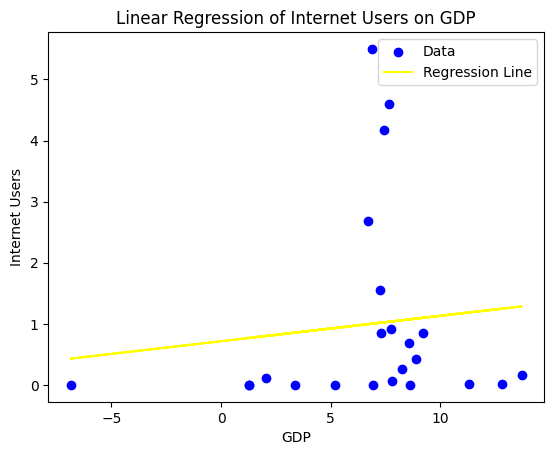

In [ ]:
plt.scatter(GDP[:, 1], Internet_users, color='blue', label='Data')
plt.plot(GDP[:, 1], intercept + slope * GDP[:, 1], color='yellow', label='Regression Line')
plt.xlabel('GDP')
plt.ylabel('Internet Users')
plt.legend()
plt.title('Linear Regression of Internet Users on GDP')
plt.show()

Regression Equation

---



In [ ]:
Tur = pd.read_excel("Turkey's Variables.xlsx", index_col=0)
Tur = Tur.transpose()

print("Index:", Tur.index) #it treats GDP as the index



index1 = pd.to_numeric(Tur.index, errors='coerce')
Tur = Tur[index1.notna()]
Tur.index = index1.dropna()


Tur['internetusers'] = pd.to_numeric(Tur['internetusers'], errors='coerce')
Tur = Tur.dropna()

GDP = Tur.index.values.astype(float)  # Independent variable (GDP)
Internet_users = Tur['internetusers'].values.astype(float)  # Dependent variable (Internet users)
GDP = sm.add_constant(GDP)

reg = sm.OLS(Internet_users, GDP).fit()


print(reg.summary())

intercept = reg.params[0]
slope = reg.params[1]

print(f"Regression Equation: Internet Users = {intercept:.2f} + {slope:.2f} * GDP")



Index: Index([         2.09,          1.04,          5.68,          9.12,
                3.82,           2.3,          11.3,          4.06,
                6.23,          4.76,          4.39,          8.58,
                5.92,           3.8,           7.4,          8.22,
                8.13,          3.88,          2.49,         -1.11,
              -0.886,          3.84,          4.62,          3.33,
                5.34,          4.63,          6.43,           8.1,
                3.28,         0.576,          8.65,         0.431,
                5.49,          7.57,         -5.82,          6.85,
                6.72,          7.28,          2.86,         -4.88,
                7.17,         -7.66,           7.7,          5.66,
                8.76,          7.26,          7.04,          4.84,
               0.735,         -4.87,          9.09,          8.42,
            '2.09.1',          3.27, 'Unnamed: 55', 'Unnamed: 56',
       'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Un

Regression Graph

---



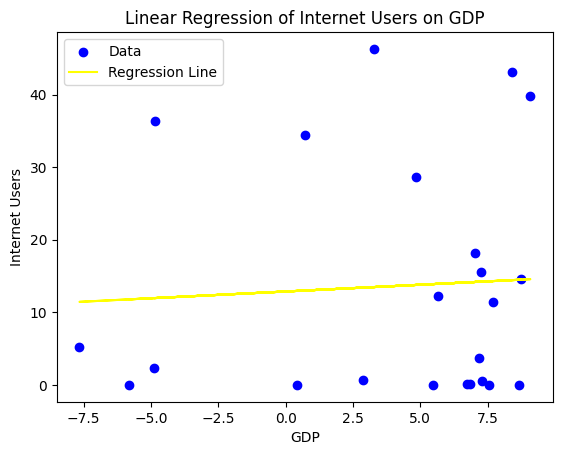

In [ ]:
plt.scatter(GDP[:, 1], Internet_users, color='blue', label='Data')
plt.plot(GDP[:, 1], intercept + slope * GDP[:, 1], color='yellow', label='Regression Line')
plt.xlabel('GDP')
plt.ylabel('Internet Users')
plt.legend()
plt.title('Linear Regression of Internet Users on GDP')
plt.show()
plt.show()

# **Single Variables Graphs**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [ ]:
EURdf1 = pd.read_excel("EURgdp.xlsx")
EURdf2 = pd.read_excel("EURbroadband.xlsx")
EURdf3 = pd.read_excel("EURpercapita.xlsx")
EURdf4 = pd.read_excel("EURcellphones.xlsx")
EURdf5 = pd.read_excel("EURcomputers.xlsx")
EURdf6 = pd.read_excel("EURinternetusers.xlsx")
EURdf7 = pd.read_excel("EURpopulation.xlsx")

AFRdf1 = pd.read_excel("AFRgdp.xlsx")
AFRdf2 = pd.read_excel("AFRbroadband.xlsx")
AFRdf3 = pd.read_excel("AFRpercapita.xlsx")
AFRdf4 = pd.read_excel("AFRcellphones.xlsx")
AFRdf5 = pd.read_excel("AFRcomputers.xlsx")
AFRdf6 = pd.read_excel("AFRinternetusers.xlsx")
AFRdf7 = pd.read_excel("AFRpopulation.xlsx")

In [ ]:
EURdf1.set_index("country",inplace= True)
EURdf2.set_index("country",inplace= True)
EURdf3.set_index("country",inplace= True)
EURdf4.set_index("country",inplace= True)
EURdf5.set_index("country",inplace= True)
EURdf6.set_index("country",inplace= True)
EURdf7.set_index("country",inplace= True)

AFRdf1.set_index("country",inplace= True)
AFRdf2.set_index("country",inplace= True)
AFRdf3.set_index("country",inplace= True)
AFRdf4.set_index("country",inplace= True)
AFRdf5.set_index("country",inplace= True)
AFRdf6.set_index("country",inplace= True)
AFRdf7.set_index("country",inplace= True)

Bar chart of percapita over the years (Africa):

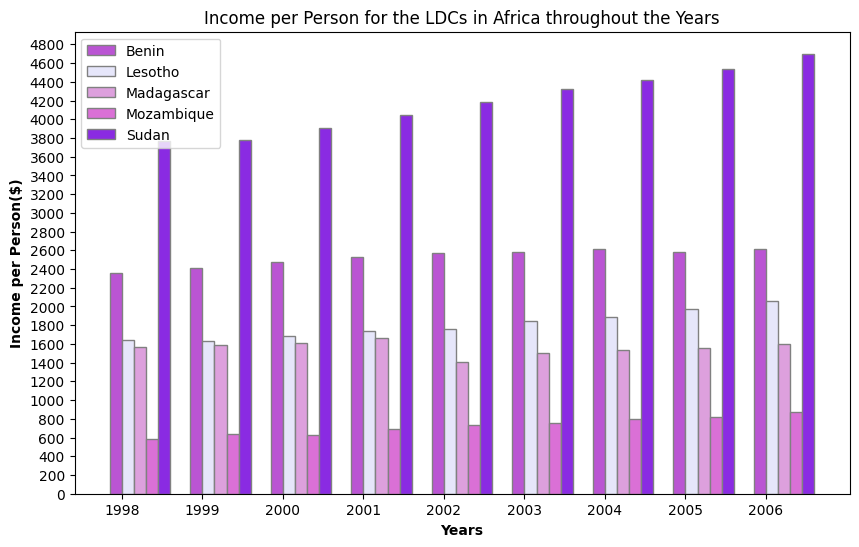

In [ ]:
Years =list(range(1998,2007))
Benin = list(AFRdf3.iloc[0])
Lesotho = list(AFRdf3.iloc[1])
Madagascar= list(AFRdf3.iloc[2])
Mozambique = list(AFRdf3.iloc[3])
Sudan= list(AFRdf3.iloc[4])
bar_width = 0.15


r1 = np.arange(len(Years))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

plt.figure(figsize=(10, 6))

plt.bar(r1, Benin, color='mediumorchid', width=bar_width, edgecolor='grey', label='Benin')
plt.bar(r2, Lesotho, color='lavender', width=bar_width, edgecolor='grey', label='Lesotho')
plt.bar(r3, Madagascar, color='plum', width=bar_width, edgecolor='grey', label='Madagascar')
plt.bar(r4, Mozambique, color='orchid', width=bar_width, edgecolor='grey', label='Mozambique')
plt.bar(r5, Sudan, color='blueviolet', width=bar_width, edgecolor='grey', label='Sudan')

plt.xlabel('Years', fontweight='bold')
plt.ylabel('Income per Person($)', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(Years))], Years)
plt.title('Income per Person for the LDCs in Africa throughout the Years')
plt.legend()
plt.yticks(np.arange(0, max(Benin + Lesotho + Madagascar + Mozambique + Sudan) + 200, 200))
plt.show()

Bar chart of percapita over the years (Europe):

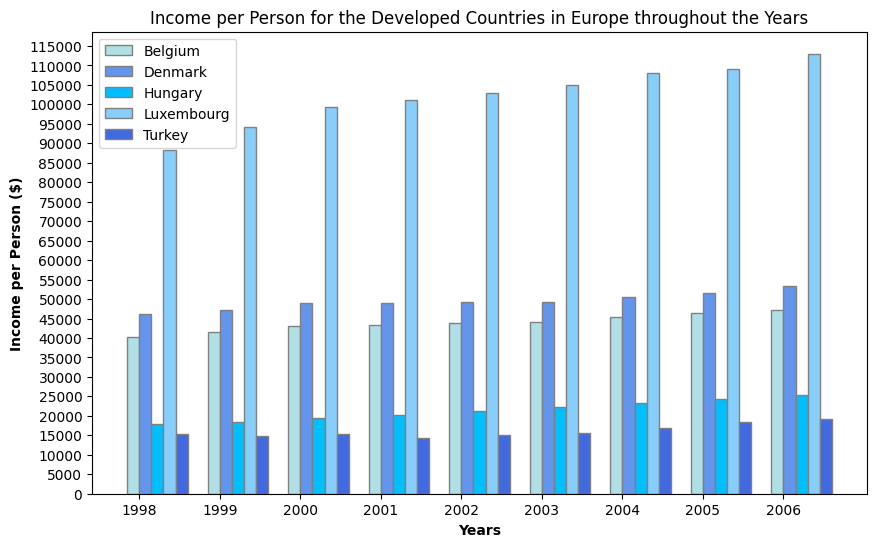

In [ ]:
Belgium = list(EURdf3.iloc[0])
Denmark = list(EURdf3.iloc[1])
Hungary= list(EURdf3.iloc[2])
Luxembourg = list(EURdf3.iloc[3])
Turkey= list(EURdf3.iloc[4])
bar_width = 0.15


r1 = np.arange(len(Years))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
plt.figure(figsize=(10, 6))
plt.bar(r1, Belgium, color='powderblue', width=bar_width, edgecolor='grey', label='Belgium')
plt.bar(r2, Denmark, color='cornflowerblue', width=bar_width, edgecolor='grey', label='Denmark')
plt.bar(r3, Hungary, color='deepskyblue', width=bar_width, edgecolor='grey', label='Hungary')
plt.bar(r4, Luxembourg, color='lightskyblue', width=bar_width, edgecolor='grey', label='Luxembourg')
plt.bar(r5, Turkey, color='royalblue', width=bar_width, edgecolor='grey', label='Turkey')



plt.xlabel('Years', fontweight='bold')
plt.ylabel('Income per Person ($)', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(Years))], Years)
plt.title('Income per Person for the Developed Countries in Europe throughout the Years')
plt.legend()
plt.yticks(np.arange(0, max(Turkey + Luxembourg + Hungary + Denmark + Belgium) + 5000, 5000))


plt.show()


Line Graph of personal computers (Africa):

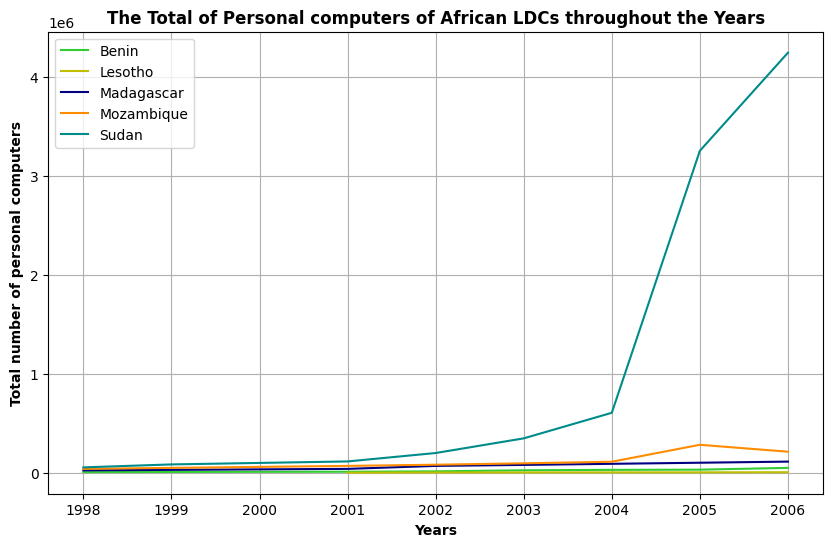

In [ ]:
Benin = list(AFRdf5.iloc[0])
Lesotho = list(AFRdf5.iloc[1])
Madagascar= list(AFRdf5.iloc[2])
Mozambique = list(AFRdf5.iloc[3])
Sudan= list(AFRdf5.iloc[4])
bar_width = 0.15

plt.figure(figsize=(10, 6))
plt.plot(Years,Benin , color='limegreen', label='Benin')
plt.plot(Years, Lesotho, color='y', label='Lesotho')
plt.plot(Years, Madagascar, color='navy', label='Madagascar')
plt.plot(Years,Mozambique, color='darkorange', label='Mozambique')
plt.plot(Years,Sudan, color='darkcyan', label='Sudan')


plt.xlabel('Years', fontweight='bold')
plt.ylabel('Total number of personal computers', fontweight='bold')
plt.title('The Total of Personal computers of African LDCs throughout the Years', fontweight='bold')
plt.legend()


plt.grid(True)
plt.show()


Line Graph of personal computers (Europe):

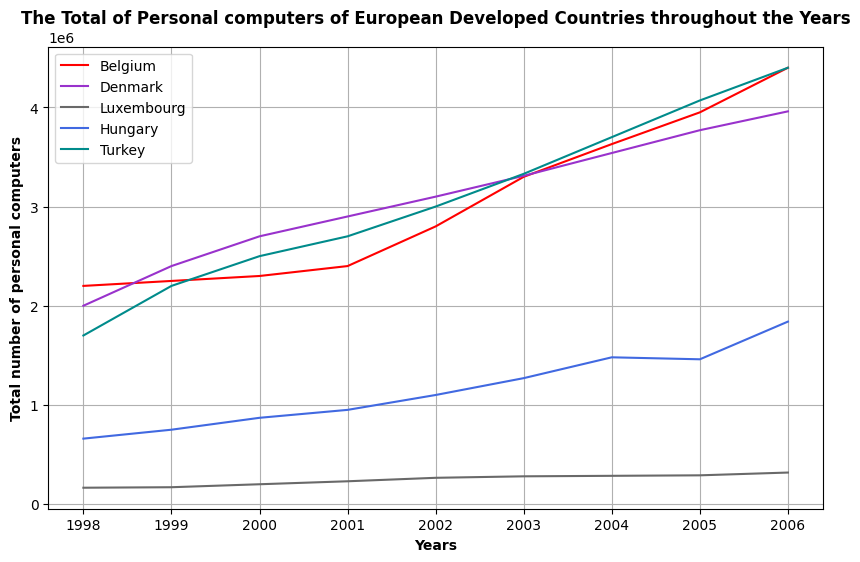

In [ ]:
Years =list(range(1998,2007))
Belgium = list(EURdf5.iloc[0])
Denmark = list(EURdf5.iloc[1])
Hungary= list(EURdf5.iloc[2])
Luxembourg = list(EURdf5.iloc[3])
Turkey= list(EURdf5.iloc[4])
bar_width = 0.15

plt.figure(figsize=(10, 6))
plt.plot(Years,Belgium , color='red', label='Belgium')
plt.plot(Years, Denmark, color='darkorchid', label='Denmark')
plt.plot(Years, Luxembourg, color='dimgrey', label='Luxembourg')
plt.plot(Years, Hungary, color='royalblue', label='Hungary')
plt.plot(Years, Turkey, color='darkcyan', label='Turkey')


plt.xlabel('Years', fontweight='bold')
plt.ylabel('Total number of personal computers', fontweight='bold')
plt.title('The Total of Personal computers of European Developed Countries throughout the Years', fontweight='bold')
plt.legend()


plt.grid(True)
plt.show()


Line Graph of internet users (Africa):

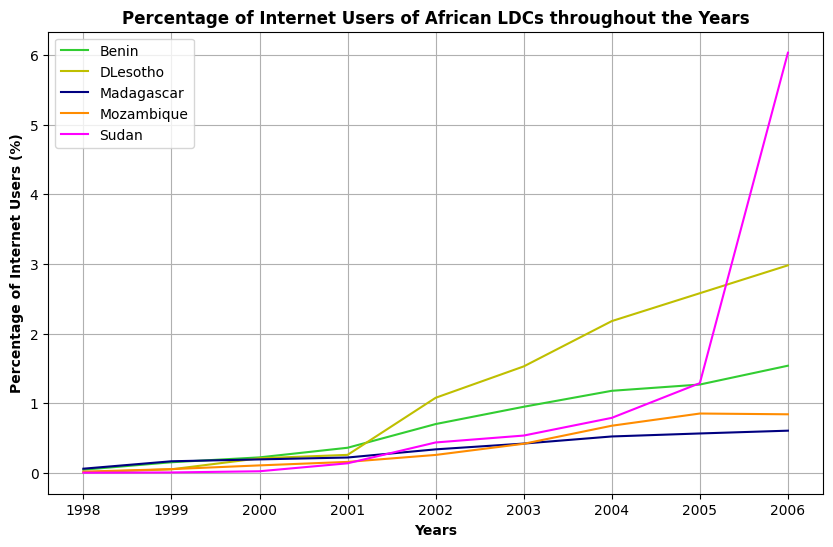

In [ ]:
Benin = list(AFRdf6.iloc[0])
Lesotho = list(AFRdf6.iloc[1])
Madagascar= list(AFRdf6.iloc[2])
Mozambique = list(AFRdf6.iloc[3])
Sudan= list(AFRdf6.iloc[4])
bar_width = 0.15

plt.figure(figsize=(10, 6))
plt.plot(Years,Benin , color='limegreen', label='Benin')
plt.plot(Years, Lesotho, color='y', label='DLesotho')
plt.plot(Years, Madagascar, color='navy', label='Madagascar')
plt.plot(Years,Mozambique, color='darkorange', label='Mozambique')
plt.plot(Years,Sudan, color='magenta', label='Sudan')


plt.xlabel('Years', fontweight='bold')
plt.ylabel('Percentage of Internet Users (%)', fontweight='bold')
plt.title('Percentage of Internet Users of African LDCs throughout the Years', fontweight='bold')
plt.legend()

plt.grid(True) #Add grid
plt.show()


Line Graph of internet users (Europe):

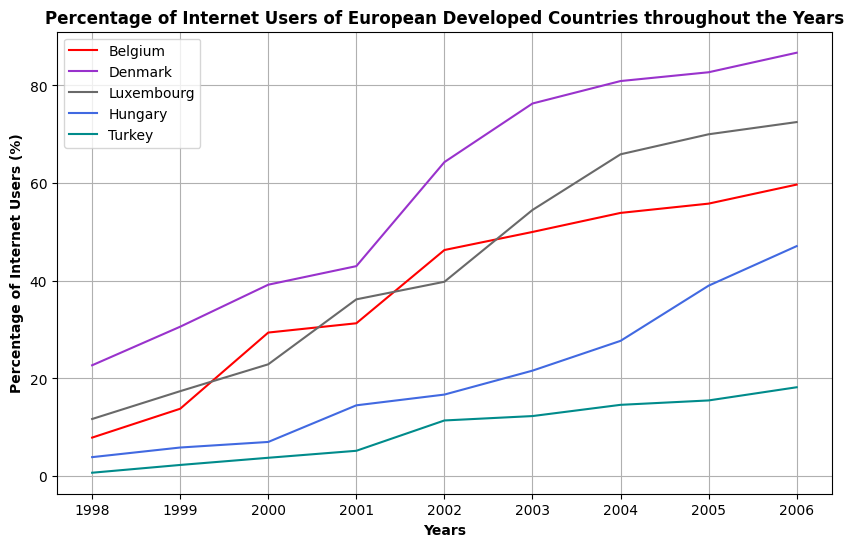

In [ ]:
Years =list(range(1998,2007))
Belgium = list(EURdf6.iloc[0])
Denmark = list(EURdf6.iloc[1])
Hungary= list(EURdf6.iloc[2])
Luxembourg = list(EURdf6.iloc[3])
Turkey= list(EURdf6.iloc[4])

plt.figure(figsize=(10, 6))
plt.plot(Years,Belgium , color='red', label='Belgium')
plt.plot(Years, Denmark, color='darkorchid', label='Denmark')
plt.plot(Years, Luxembourg, color='dimgrey', label='Luxembourg')
plt.plot(Years, Hungary, color='royalblue', label='Hungary')
plt.plot(Years, Turkey, color='darkcyan', label='Turkey')

# Add labels, title, and legend
plt.xlabel('Years', fontweight='bold')
plt.ylabel('Percentage of Internet Users (%)', fontweight='bold')
plt.title('Percentage of Internet Users of European Developed Countries throughout the Years', fontweight='bold')
plt.legend()

plt.grid(True) #Add grid
plt.show()


Line graph of GDP (Africa):

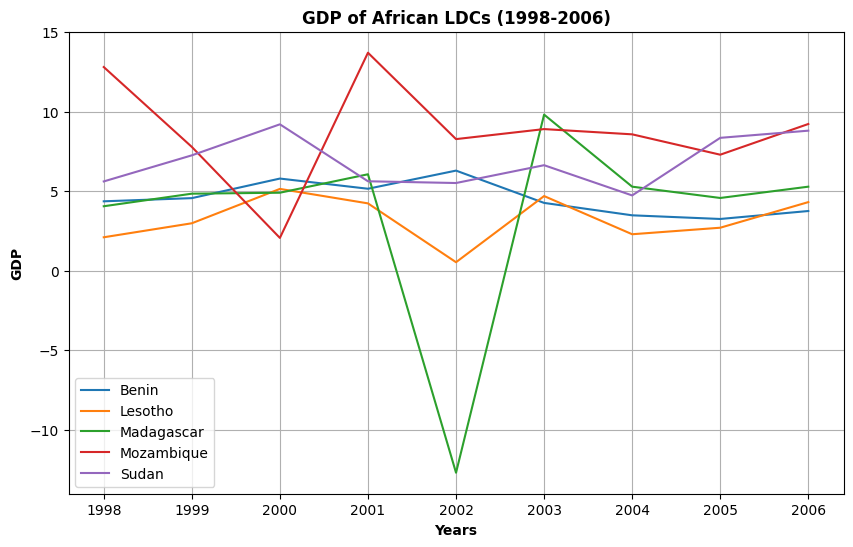

In [ ]:

Acountries = AFRdf1.index
years = range(1998, 2007)
plt.figure(figsize=(10, 6))
for country in Acountries:
    plt.plot(years, AFRdf1.loc[country], label=country)


plt.xlabel('Years', fontweight='bold')
plt.ylabel('GDP', fontweight='bold')
plt.title('GDP of African LDCs (1998-2006)', fontweight='bold')
plt.legend()

plt.grid(True)
plt.show()


Line Graph of GDP (Europe):

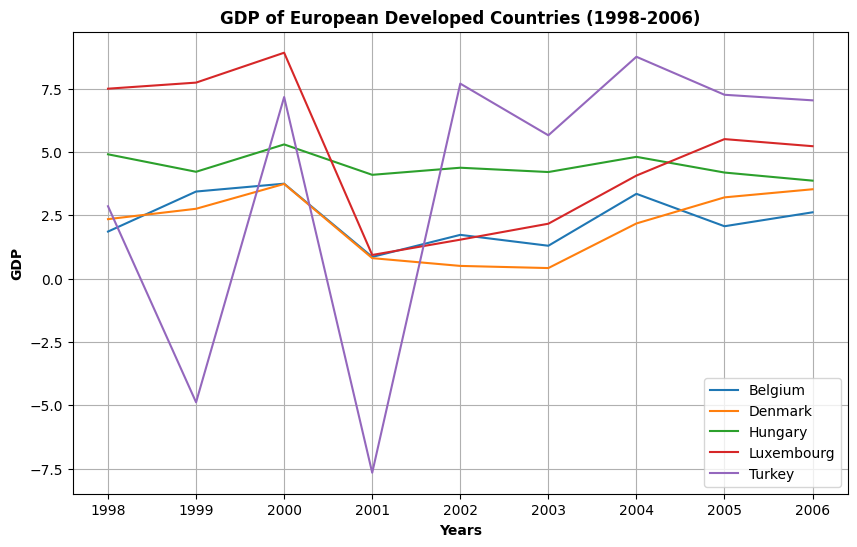

In [ ]:

years = range(1998, 2007)
Ecountries = EURdf1.index


plt.figure(figsize=(10, 6))
for country in Ecountries:
    plt.plot(years, EURdf1.loc[country], label=country)


plt.xlabel('Years', fontweight='bold')
plt.ylabel('GDP', fontweight='bold')
plt.title('GDP of European Developed Countries (1998-2006)', fontweight='bold')
plt.legend()

plt.grid(True)  # Add grid
plt.show()


Line Graph of Africa's population:

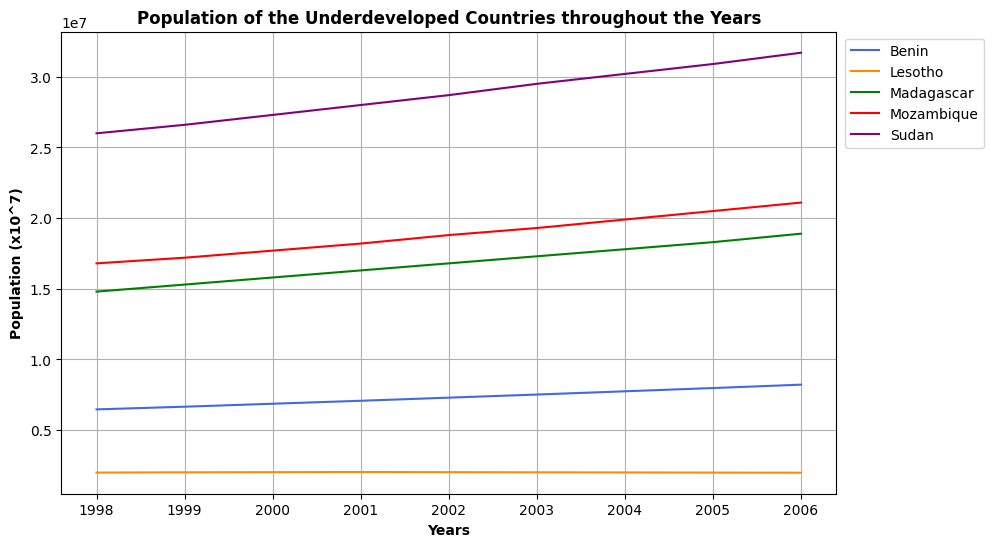

In [ ]:
Years =list(range(1998,2007))
Benin = list((AFRdf7).iloc[0])
Lesotho = list(AFRdf7.iloc[1])
Madagascar= list(AFRdf7.iloc[2])
Mozambique = list(AFRdf7.iloc[3])
Sudan= list(AFRdf7.iloc[4])
bar_width = 0.15

plt.figure(figsize=(10, 6))
plt.plot(Years,Benin , color='royalblue', label='Benin')
plt.plot(Years, Lesotho, color='darkorange', label='Lesotho')
plt.plot(Years, Madagascar, color='green', label='Madagascar')
plt.plot(Years, Mozambique, color='red', label='Mozambique')
plt.plot(Years, Sudan, color='purple', label='Sudan')

plt.xlabel('Years', fontweight='bold')
plt.ylabel('Population (x10^7)', fontweight='bold')
plt.title('Population of the Underdeveloped Countries throughout the Years', fontweight='bold')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.grid(True)
plt.show()


Line Graph of European Population:

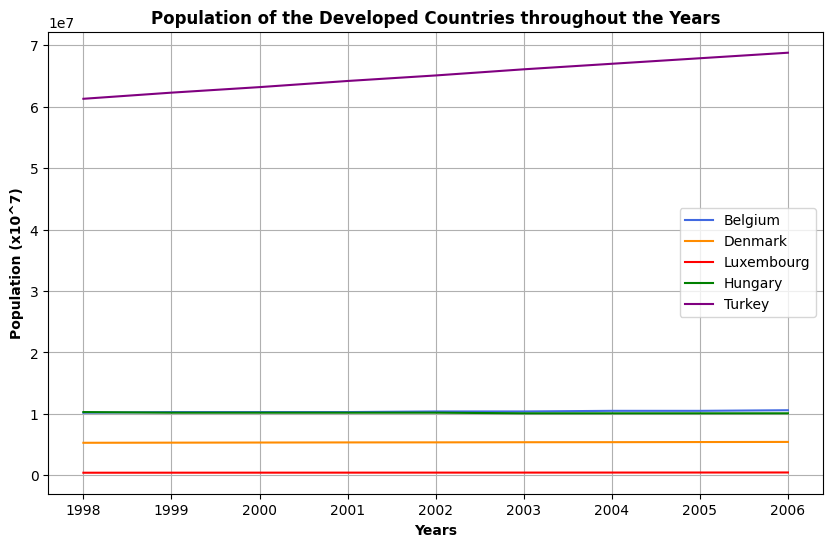

In [ ]:
Belgium = list(EURdf7.iloc[0])
Denmark = list(EURdf7.iloc[1])
Hungary= list(EURdf7.iloc[2])
Luxembourg = list(EURdf7.iloc[3])
Turkey= list(EURdf7.iloc[4])
bar_width = 0.15

plt.figure(figsize=(10, 6))
plt.plot(Years,Belgium , color='royalblue', label='Belgium')
plt.plot(Years, Denmark, color='darkorange', label='Denmark')
plt.plot(Years, Luxembourg, color='red', label='Luxembourg')
plt.plot(Years, Hungary, color='green', label='Hungary')
plt.plot(Years, Turkey, color='purple', label='Turkey')

plt.xlabel('Years', fontweight='bold')
plt.ylabel('Population (x10^7)', fontweight='bold')
plt.title('Population of the Developed Countries throughout the Years', fontweight='bold')
plt.legend()

plt.grid(True)
plt.show()

Bar Chart of income per person of LDCs

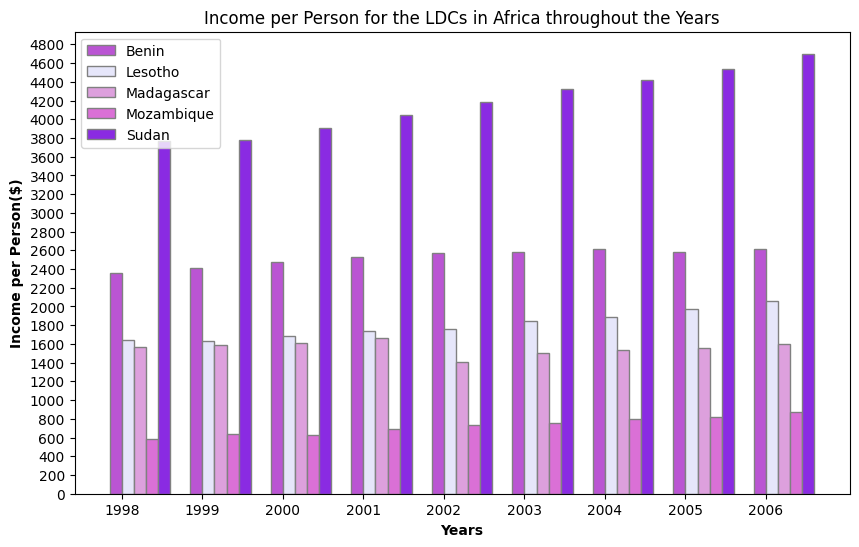

In [ ]:
Years =list(range(1998,2007))
Benin = list(AFRdf3.iloc[0])
Lesotho = list(AFRdf3.iloc[1])
Madagascar= list(AFRdf3.iloc[2])
Mozambique = list(AFRdf3.iloc[3])
Sudan= list(AFRdf3.iloc[4])
bar_width = 0.15

# Set the positions of the bars on the x-axis
r1 = np.arange(len(Years))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

plt.figure(figsize=(10, 6))

# Create bar plots
plt.bar(r1, Benin, color='mediumorchid', width=bar_width, edgecolor='grey', label='Benin')
plt.bar(r2, Lesotho, color='lavender', width=bar_width, edgecolor='grey', label='Lesotho')
plt.bar(r3, Madagascar, color='plum', width=bar_width, edgecolor='grey', label='Madagascar')
plt.bar(r4, Mozambique, color='orchid', width=bar_width, edgecolor='grey', label='Mozambique')
plt.bar(r5, Sudan, color='blueviolet', width=bar_width, edgecolor='grey', label='Sudan')


# Add labels, title, and legend
plt.xlabel('Years', fontweight='bold')
plt.ylabel('Income per Person($)', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(Years))], Years)
plt.title('Income per Person for the LDCs in Africa throughout the Years')
plt.legend()
plt.yticks(np.arange(0, max(Benin + Lesotho + Madagascar + Mozambique + Sudan) + 200, 200))
plt.show()

Bar Chart for Developed European countries

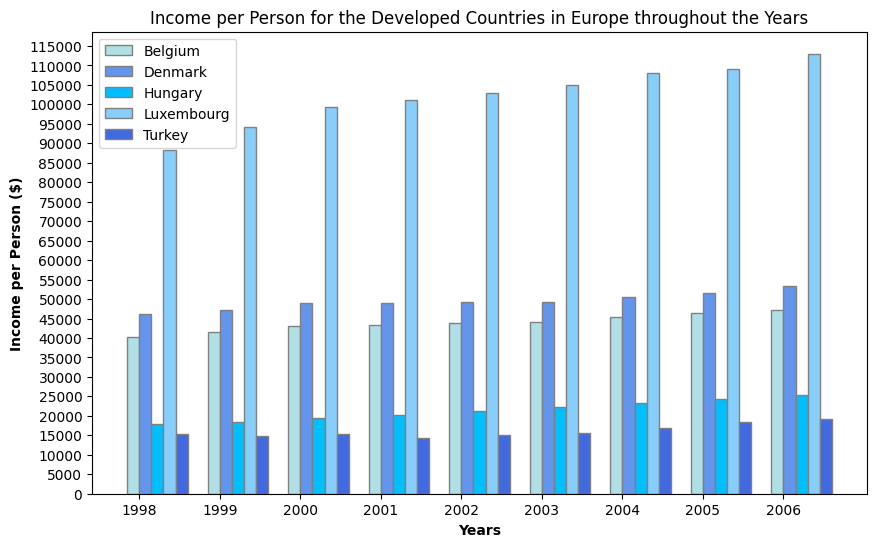

In [ ]:
Belgium = list(EURdf3.iloc[0])
Denmark = list(EURdf3.iloc[1])
Hungary= list(EURdf3.iloc[2])
Luxembourg = list(EURdf3.iloc[3])
Turkey= list(EURdf3.iloc[4])
bar_width = 0.15


r1 = np.arange(len(Years))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

plt.figure(figsize=(10, 6))

plt.bar(r1, Belgium, color='powderblue', width=bar_width, edgecolor='grey', label='Belgium')
plt.bar(r2, Denmark, color='cornflowerblue', width=bar_width, edgecolor='grey', label='Denmark')
plt.bar(r3, Hungary, color='deepskyblue', width=bar_width, edgecolor='grey', label='Hungary')
plt.bar(r4, Luxembourg, color='lightskyblue', width=bar_width, edgecolor='grey', label='Luxembourg')
plt.bar(r5, Turkey, color='royalblue', width=bar_width, edgecolor='grey', label='Turkey')



plt.xlabel('Years', fontweight='bold')
plt.ylabel('Income per Person ($)', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(Years))], Years)
plt.title('Income per Person for the Developed Countries in Europe throughout the Years')
plt.legend()
plt.yticks(np.arange(0, max(Turkey + Luxembourg + Hungary + Denmark + Belgium) + 5000, 5000))


plt.show()

# **Measures of Center & Measures of spread**

In [ ]:
row_avg_AFRdf3 = AFRdf3.mean(axis=1)

Var_AFRdf3=AFRdf3.var(axis=1)

Std_AFRdf3=AFRdf3.std(axis=1)

print(row_avg_AFRdf3)
print(Var_AFRdf3)
print(Std_AFRdf3)



row_avg_EURdf3 = EURdf3.mean(axis=1)

Var_EURdf3=EURdf3.var(axis=1)

Std_EURdf3=EURdf3.std(axis=1)

print(row_avg_EURdf3)
print(Var_EURdf3)
print(Std_EURdf3)



row_avg_AFRdf5 = AFRdf5.mean(axis=1)

Var_AFRdf5=AFRdf5.var(axis=1)

Std_AFRdf5=AFRdf5.std(axis=1)

print(row_avg_AFRdf5)
print(Var_AFRdf5)
print(Std_AFRdf5)


row_avg_EURdf5 = EURdf5.mean(axis=1)

Var_EURdf5=EURdf5.var(axis=1)

Std_EURdf5=EURdf5.std(axis=1)

print(row_avg_EURdf5)
print(Var_EURdf5)
print(Std_EURdf5)



row_avg_AFRdf6 = AFRdf6.mean(axis=1)

Var_AFRdf6=AFRdf6.var(axis=1)

Std_AFRdf6=AFRdf6.std(axis=1)


print(row_avg_AFRdf6)
print(Var_AFRdf6)
print(Std_AFRdf6)


row_avg_EURdf6 = EURdf6.mean(axis=1)

Var_EURdf6=EURdf6.var(axis=1)

Std_EURdf6=EURdf6.std(axis=1)

print(row_avg_EURdf6)
print(Var_EURdf6)
print(Std_EURdf6)



AFRdf3_clean = AFRdf3.dropna(how='all')
row_avg_AFRdf3 = AFRdf3.mean(axis=1, skipna=True)

Var_AFRdf3=AFRdf3.var(axis=1,skipna = True)

Std_AFRdf3=AFRdf3.std(axis=1, skipna = True)

print('Sample Mean', row_avg_AFRdf3)
print('Sample Variance', Var_AFRdf3)
print('Standard Error', Std_AFRdf3)


EURdf3_clean = EURdf3.dropna(how='all')
row_avg_EURdf3 = EURdf3.mean(axis=1, skipna= True)

Var_EURdf3=EURdf3.var(axis=1, skipna = True)

Std_EURdf3=EURdf3.std(axis=1, skipna = True)

print('Sample Mean',row_avg_EURdf3)
print('Sample Variance',Var_EURdf3)
print('Standard Error', Std_EURdf3)


AFRdf5_clean = AFRdf5.dropna(how='all')
row_avg_AFRdf5 = AFRdf5.mean(axis=1, skipna= True)

Var_AFRdf5=AFRdf5.var(axis=1, skipna = True)

Std_AFRdf5=AFRdf5.std(axis=1, skipna = True)

print('Sample Mean',row_avg_AFRdf5)
print('Sample Variance',Var_AFRdf5)
print('Standard Error',Std_AFRdf5)

EURdf5_clean = EURdf5.dropna(how='all')
row_avg_EURdf5 = EURdf5.mean(axis=1, skipna = True)

Var_EURdf5=EURdf5.var(axis=1, skipna = True)

Std_EURdf5=EURdf5.std(axis=1, skipna = True)

print('Sample Mean',row_avg_EURdf5)
print('Sample Variance',Var_EURdf5)
print('Standard Error',Std_EURdf5)


AFRdf6_clean = AFRdf6.dropna(how='all')
row_avg_AFRdf6 = AFRdf6.mean(axis=1, skipna = True)

Var_AFRdf6=AFRdf6.var(axis=1, skipna = True)

Std_AFRdf6=AFRdf6.std(axis=1, skipna = True)


print('Sample Mean',row_avg_AFRdf6)
print('Sample Variance',Var_AFRdf6)
print('Standard Error',Std_AFRdf6)





EURdf2_clean = EURdf2.dropna(how='all')

row_avg_EURdf2 = EURdf2.mean(axis=1, skipna = True)

Var_EURdf2=EURdf2.var(axis=1, skipna = True)

Std_EURdf2=EURdf2.std(axis=1, skipna = True)

print('Sample Mean Cellphone Users (EUR)',row_avg_EURdf2)
print('Sample Variance Cellphone Users (EUR)',Var_EURdf2)
print('Standard Error Cellphone Users (EUR)',Std_EURdf2)

AFRdf2_clean = AFRdf2.dropna(how='all')

row_avg_AFRdf2 = AFRdf2.mean(axis=1, skipna = True)

Var_AFRdf2=AFRdf2.var(axis=1, skipna = True)

Std_AFRdf2=AFRdf2.std(axis=1, skipna = True)

print('Sample Mean Cellphone Users (AFR)',row_avg_AFRdf2)
print('Sample Variance Cellphone Users (AFR)',Var_AFRdf2)
print('Standard Error Cellphone Users (AFR)',Std_AFRdf2)






EURdf4_clean = EURdf4.dropna(how='all')

row_avg_EURdf4 = EURdf4.mean(axis=1, skipna = True)

Var_EURdf4=EURdf4.var(axis=1, skipna = True)

Std_EURdf4=EURdf4.std(axis=1, skipna = True)

print('Sample Mean Broadband (EUR)',row_avg_EURdf4)
print('Sample Variance Broadband (EUR)',Var_EURdf4)
print('Standard Error Broadband (EUR)',Std_EURdf4)

AFRdf4_clean = AFRdf4.dropna(how='all')

row_avg_AFRdf4 = AFRdf4.mean(axis=1, skipna = True)

Var_AFRdf4=AFRdf4.var(axis=1, skipna = True)

Std_AFRdf4=AFRdf4.std(axis=1, skipna = True)

print('Sample Mean Broadband (AFR)',row_avg_AFRdf4)
print('Sample Variance Broadband (AFR)',Var_AFRdf4)
print('Standard Error Broadband (AFR)',Std_AFRdf4)







EURdf7_clean = EURdf7.dropna(how='all')

row_avg_EURdf7 = EURdf7.mean(axis=1, skipna = True)

Var_EURdf7=EURdf7.var(axis=1, skipna = True)

Std_EURdf7=EURdf7.std(axis=1, skipna = True)

print('Sample Mean Population (EUR)',row_avg_EURdf7)
print('Sample Variance Population (EUR)',Var_EURdf7)
print('Standard Error Population (EUR)',Std_EURdf7)

AFRdf7_clean = AFRdf7.dropna(how='all')

row_avg_AFRdf7 = AFRdf7.mean(axis=1, skipna = True)

Var_AFRdf7=AFRdf7.var(axis=1, skipna = True)

Std_AFRdf7=AFRdf7.std(axis=1, skipna = True)

print('Sample Mean Population (AFR)',row_avg_AFRdf7)
print('Sample Variance Population (AFR',Var_AFRdf2)
print('Standard Error Population (AFR)',Std_AFRdf2)




country
Benin         2525.555556
Lesotho       1803.333333
Madagascar    1558.888889
Mozambique     724.666667
Sudan         4185.555556
dtype: float64
country
Benin           8127.777778
Lesotho        22350.000000
Madagascar      5261.111111
Mozambique      9244.250000
Sudan         111852.777778
dtype: float64
country
Benin          90.154189
Lesotho       149.499164
Madagascar     72.533517
Mozambique     96.147023
Sudan         334.443983
dtype: float64
country
Belgium        43922.222222
Denmark        49455.555556
Hungary        21422.222222
Luxembourg    102288.888889
Turkey         16122.222222
dtype: float64
country
Belgium       4.839444e+06
Denmark       4.535278e+06
Hungary       6.939444e+06
Luxembourg    5.954861e+07
Turkey        2.929444e+06
dtype: float64
country
Belgium       2199.873734
Denmark       2129.619163
Hungary       2634.282529
Luxembourg    7716.774657
Turkey        1711.561990
dtype: float64
country
Benin          21088.888889
Lesotho        19704.07142